In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/Car_price_prediction/main/dataset/1.04.%20Real-life%20example.csv")
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [88]:
print(df.isnull().sum())
print(df.duplicated().sum())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
73


In [89]:
df.dropna(inplace = True)
print(df.isnull().sum())
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64
0


In [90]:
df.corr(numeric_only = True)

,Price,Mileage,EngineV,Year
Price,1.000000,-0.467020,0.056607,0.482254
Mileage,-0.467020,1.000000,0.025992,-0.659998
EngineV,0.056607,0.025992,1.000000,-0.030882
Year,0.482254,-0.659998,-0.030882,1.000000


dealing with outliers

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4339     17900.0
4340    125000.0
4341      6500.0
4342      8000.0
4344     13500.0
Name: Price, Length: 3975, dtype: float64
Price 4.573431787192262 Mileage 0.7040205553815342 EngineV 17.066126300156633 Year -0.9618801579156085


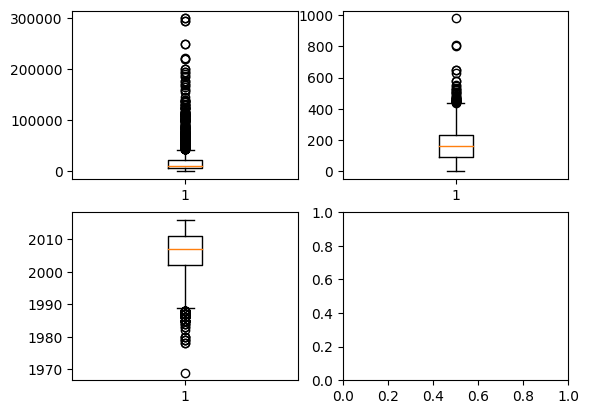

In [91]:
print(df['Price'])
print("Price",df['Price'].skew(),"Mileage",df['Mileage'].skew(),"EngineV",df['EngineV'].skew(),"Year",df['Year'].skew())
def pltbox():
  fig, axes = plt.subplots(2,2)
  axes[0,0].boxplot(df['Price'])
  axes[0,1].boxplot(df['Mileage'])
  axes[1,0].boxplot(df['Year'])
pltbox()

Considering anything above 90th percentile to be an outlier

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...,...
3717,4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3718,4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3719,4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3720,4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


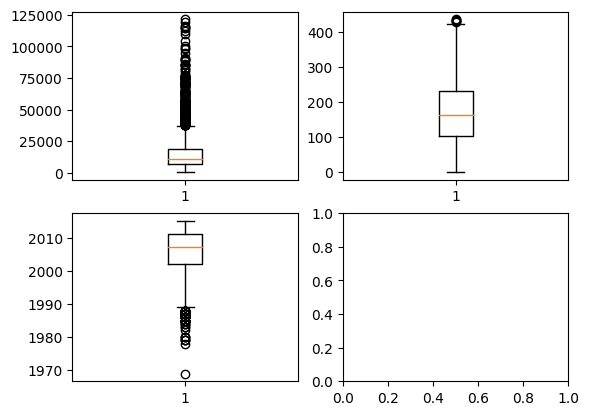

In [92]:
limitPrice = df['Price'].quantile(0.99)
limitYear = df['Year'].quantile(0.99)
limitMileage = df['Mileage'].quantile(0.99)
df = df[df['Price']<limitPrice]
df = df[df['Year']<limitYear]
df = df[df['Mileage']<limitMileage]
pltbox()
df.reset_index()

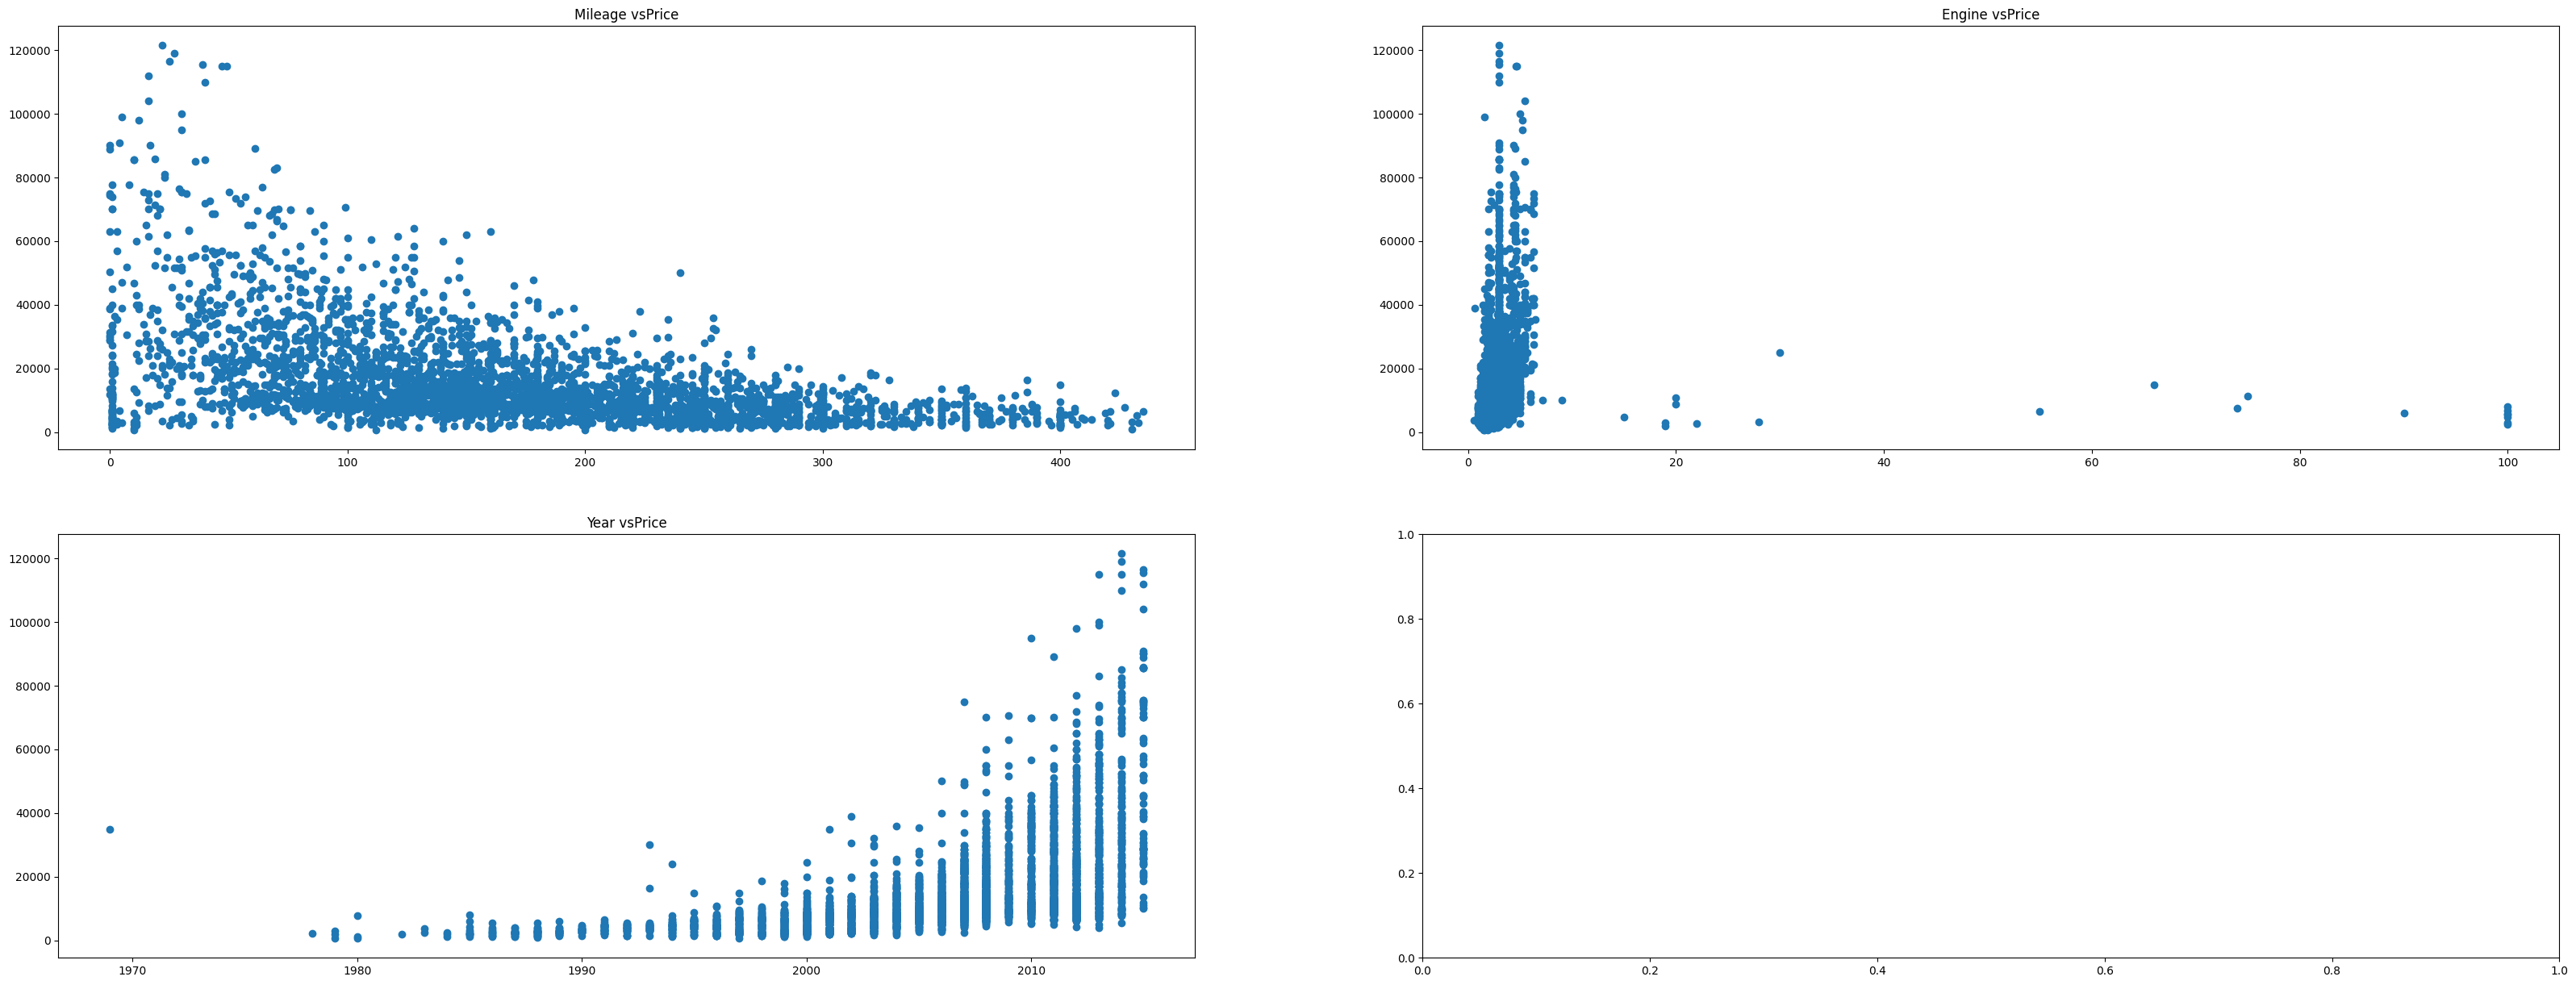

In [93]:
def pt(y):
  fig,axes = plt.subplots(2,2)
  fig.set_figheight(15)
  fig.set_figwidth(40)
  axes[0,0].scatter(df['Mileage'],df[y])
  axes[0,0].set_title("Mileage vs"+y)
  axes[0,1].scatter(df['EngineV'],df[y])
  axes[0,1].set_title("Engine vs"+y)
  axes[1,0].scatter(df['Year'],df[y])
  axes[1,0].set_title('Year vs'+y)
pt('Price')

No linear relationship so applying log transformation

,Price,Mileage,EngineV,Year,log_Price
Price,1.000000,-0.503564,0.048196,0.537896,0.860293
Mileage,-0.503564,1.000000,0.032854,-0.626477,-0.546559
EngineV,0.048196,0.032854,1.000000,-0.034593,0.034309
Year,0.537896,-0.626477,-0.034593,1.000000,0.726761
log_Price,0.860293,-0.546559,0.034309,0.726761,1.000000


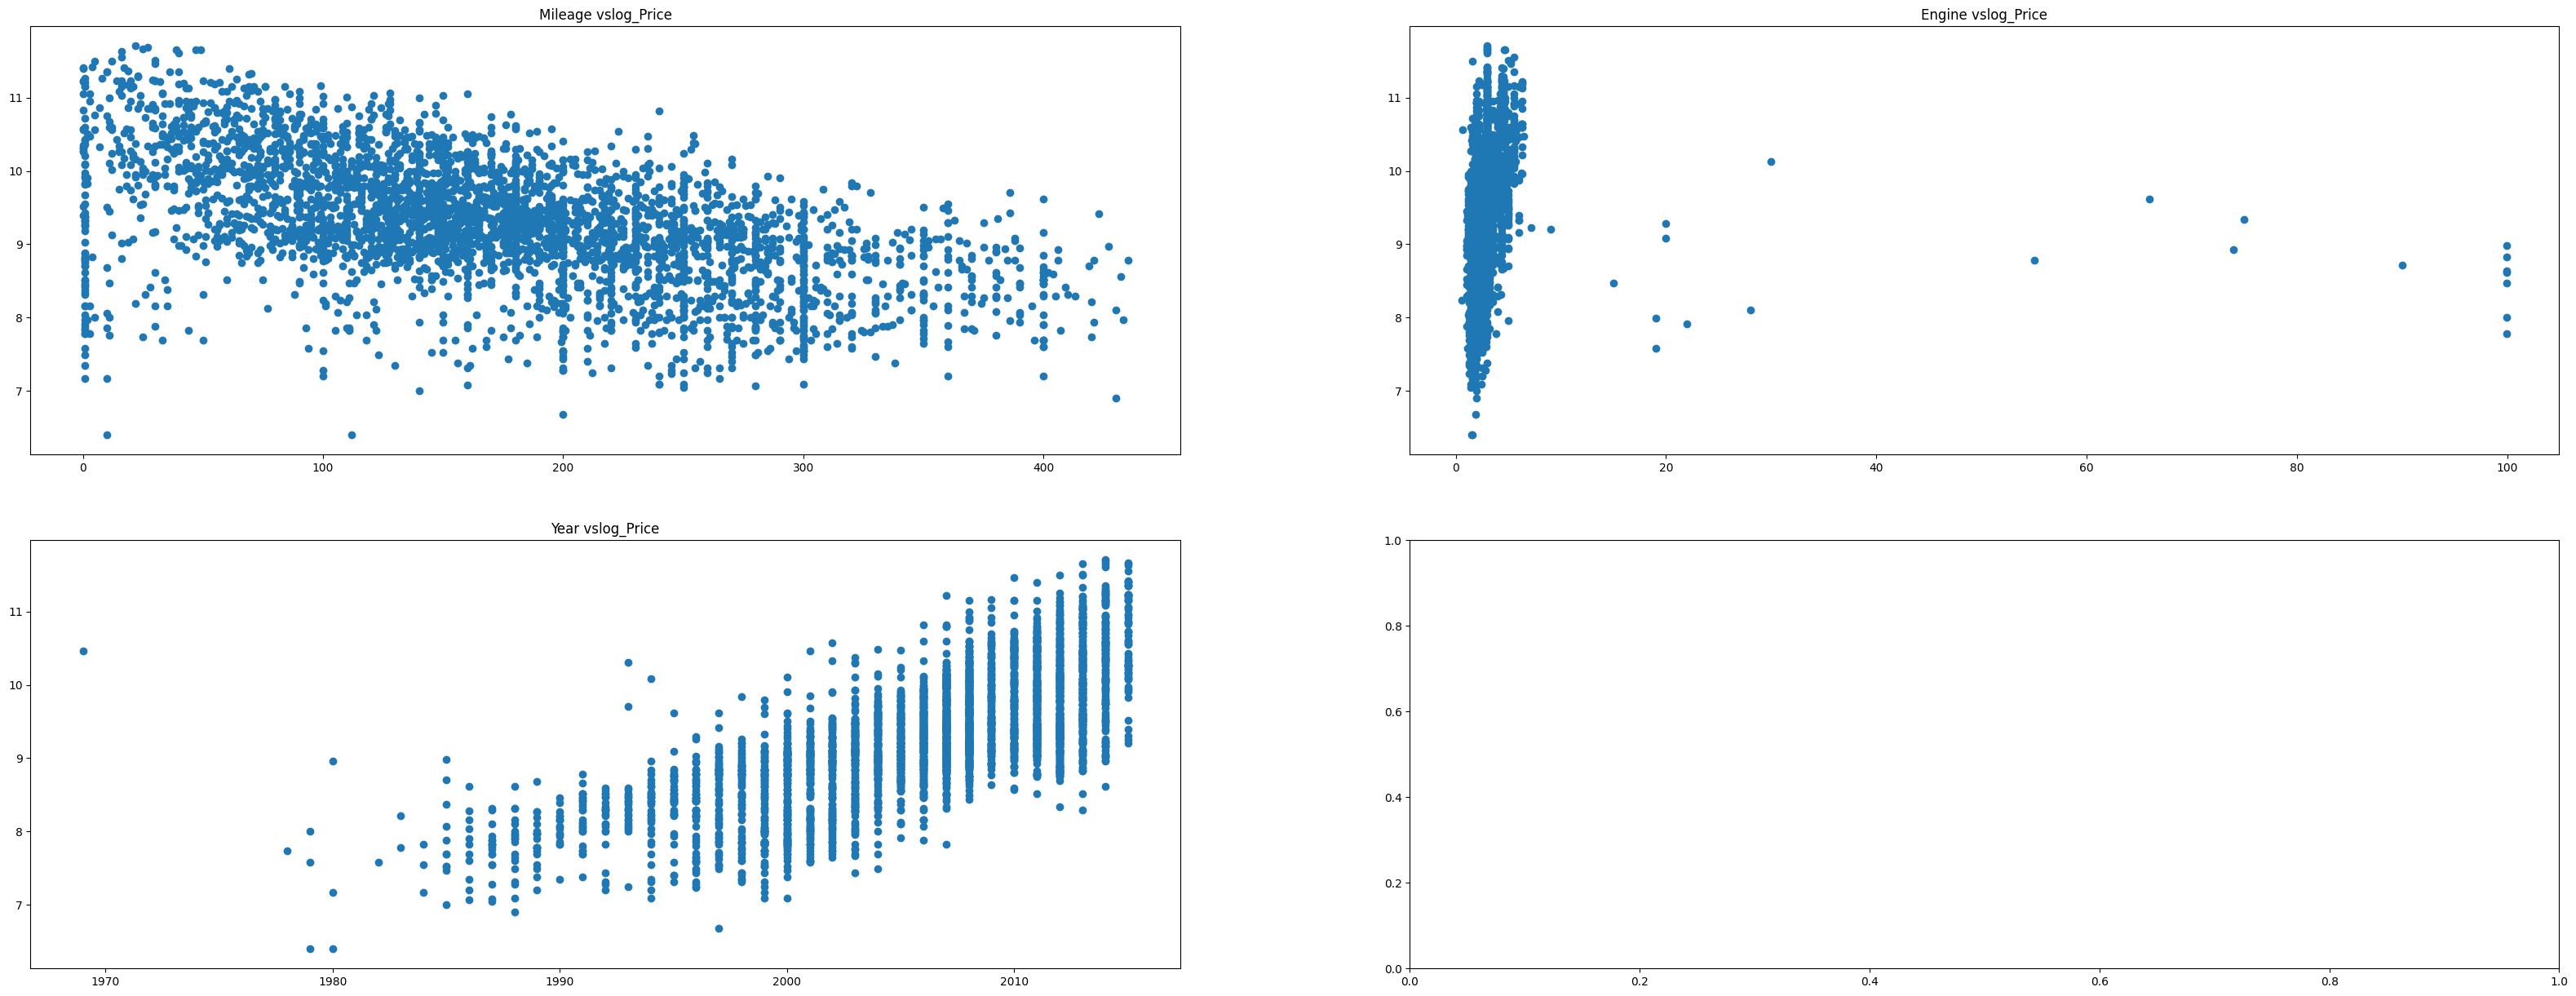

In [94]:
df['log_Price'] = np.log(df['Price'])
pt('log_Price')
df.corr(numeric_only = True)

dropping enginev as it has no linear pattern and is most skewed also has very less correlation with price

In [95]:
df.drop(['EngineV','Model'],axis = 1,inplace = True)


Applying one hot encoding for converting categorical columns

In [96]:
cat_columns = ['Brand','Body','Engine Type','Registration']
new_df = pd.get_dummies(df, columns = cat_columns)
new_df

,Price,Mileage,Year,log_Price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,1991,8.342840,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,1999,8.974618,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,13300.0,358,2003,9.495519,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,2007,10.043249,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2011,9.814656,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.0,163,2008,9.350102,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4339,17900.0,35,2014,9.792556,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4341,6500.0,1,1999,8.779557,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,8000.0,194,1985,8.987197,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


Splitting the data into train and test

In [100]:
X = new_df.drop(['Price','log_Price'],axis=1)
y = new_df['log_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


Checking train data one last time

In [101]:
X_train

,Mileage,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
1877,350,2003,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
658,260,2002,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4084,234,2008,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
265,237,2003,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2159,50,2015,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,188,2008,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
948,250,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3637,159,2006,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3650,100,2013,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


Training the Model

In [102]:
clf = LinearRegression()

clf.fit(X_train,y_train)

LinearRegression()

Checking the accuracy

In [103]:
clf.score(X_test,y_test)

0.809295568110082

80% accuracy